In [1]:
import numpy as np
import matplotlib.pyplot as plt
import randolph as r
import matplotlib.animation as animate
%matplotlib nbagg

In [2]:
def P(w, t = 1.):
    return (np.sin((w0 - w) * t / 2) / (w0 - w)) ** 2

def f0(x):
    return x

def f1(x):
    return x ** 3

def f2(x):
    return x ** 2

def f3(x):
    return -x ** 2

def f4(x):
    return x ** 4 / 4 - x ** 2

def f2_prime(x):
    return 2 * x

def f5(x):
    return -np.cos(x)


## PID Control

There are so many variables in a system that it quickly becomes difficult to analyze and control it using a theoretical approach. For example, if you want to set the speed of your car, it isn't as symple as calculating air resistance and counteracting it with enough engine power to maintain speed -- one must consider the air density, road inclide, weight of the passengers, etc. to create and solve the ODE. Vehicle manufactures might add sensors to account for these variables, but it quickly becomes inefficient. Therefore, an algorithm is used to adjust for these unknown values in real time. 
$\newline$
*All functions are used as if they're unknown in the algorithm

### Proportional, Integral, and Derivative Terms

The algorithm is called PID control, where PID respectively stands for proportional, integral, and derivative. It measures how much the current value is off from a set value and uses the difference to adjust the output. In short, the algorithm changes the output value in order to minimize the error. The algorithm uses 3 constants: one for a proportional term, one for an integral term, and one for a derivative term. Each term affects the system in a different way, and the following graphs show how:

<IPython.core.display.Javascript object>


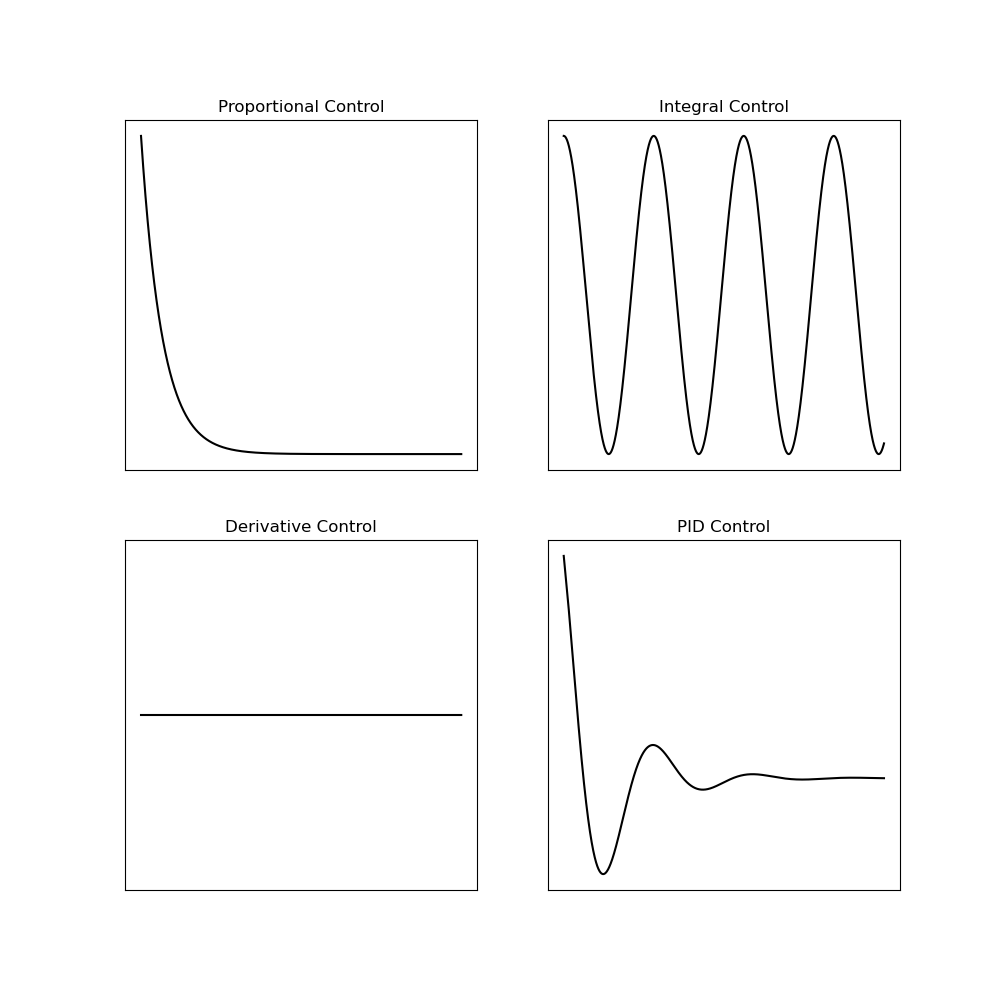

In [3]:
kp = 0.0015
ki = 0.05
kd = 0.00001
num = 10000

N = np.linspace(0, num, num)

#collects the data for how the proportional term, integral term, and derivative term affects the algorithm; then, how they all 
#combine to form the behavior of pid control
pid_p = r.PID(f0, kp, 0., 0., 0., x0 = 1, n = num, dt = 0.0001)
pid_i = r.PID(f0, 0., ki, 0., 0., x0 = 1, n = num, dt = 0.0001)
pid_d = r.PID(f0, 0., 0., kd, 0., x0 = 1, n = num, dt = 0.0001)
pid = r.PID(f0, kp, ki, kd, 0., x0 = 1, n = num, dt = 0.0001)


#graphs to show the behaviors of all terms
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0][0].plot(N, pid_p[0], 'k-')
ax[0][0].set_title('Proportional Control')

ax[0][1].plot(N, pid_i[0], 'k-')
ax[0][1].set_title('Integral Control')

ax[1][0].plot(N, pid_d[0], 'k-')
ax[1][0].set_title('Derivative Control')

ax[1][1].plot(N, pid[0], 'k-')
ax[1][1].set_title('PID Control')


plt.setp(ax, xticks = [], yticks = [])
plt.show()

The reason the graphs have these behaviors becomes clear from the math. Letting $E(t)$ be the error, $\Delta x$ be the adjustment, and $\Delta t$ be the iteration of the algorithm, the following equations are then obtained:
\begin{equation}
K_P E(t)=\frac{\Delta x}{\Delta t} \qquad \qquad K_I \Sigma E(t) \Delta t =\frac{\Delta x}{\Delta t} \qquad \qquad K_D \frac{\Delta (E(t))}{\Delta t} = \frac{\Delta x}{\Delta t} \qquad \qquad (1)
\end{equation}
Taking the differential limits $\Delta x \rightarrow dx$ and $\Delta t \rightarrow dt$, (1) becomes
\begin{equation}
K_P E(t)=\frac{dx}{dt} \qquad\qquad K_I \int E(t) dt =\frac{dx}{dt} \qquad\qquad K_D \frac{d(E(t))}{dt} = \frac{dx}{dt} \qquad \qquad (2)
\end{equation}
This raises an issue since $E(t) \equiv y_0 - y$. The equations aren't easily solvable for a general case. However, in the above example, I defined $y=x$ and $y_0=0$ (for simplicity). So, at least for this problem, the equations become
\begin{equation}
-K_P x=\frac{dx}{dt} \qquad\qquad -K_I \int x dt =\frac{dx}{dt} \qquad\qquad -K_D \frac{dx}{dt} = \frac{dx}{dt} \qquad \qquad (3)
\end{equation}
The proportional and derivative terms are fairly simple differential equations. The only issue is with the integral term; however, by differentiating both sides, we can convert it into a second order ODE. Solving the three equations gives
\begin{equation}
x(t)=x_0 e^{-K_P t} \qquad\qquad x(t)=\cos \left(\sqrt{K_I}t+\phi \right) \qquad\qquad K_D(x_0-x) =x-x_0 \qquad \qquad (4)
\end{equation}
As we can see in the graphs, the first gives an exponential decay and the second a sinusoidal; as for the third, it must be a horizontal line for the equation to hold.
$\newline$ 
$\newline$

For PID, each term is used to adjust the output. For the general case, the equations in (2) are summed to give 
\begin{equation}
K_P E(t)+K_I \int E(t) dt + K_D \frac{d(E(t))}{dt} = \frac{dx}{dt} \qquad \qquad (5)
\end{equation}
Again, the uncertainty in the equation used makes it difficult to generalize further. Working with our example though, we sum the $\frac{dx}{dt}$ equations together to obtain
\begin{equation}
-K_P x-K_I \int x dt +\frac{1}{1+K_D}= \frac{dx}{dt} \qquad \qquad (6)
\end{equation}
Differentiating to take care of the integral sign, we get the second order ODE
\begin{equation}
\frac{d^2x}{dt^2}+K_P \frac{dx}{dt}+K_I x = 0 \qquad \qquad (7)
\end{equation}
It should be noted that in this case, differentiating removed the $K_D$ constant; this normally won't happen.
$\newline$
This is the ODE for a damped harmonic oscillator. As long as the constants are chosen properly, solutions to the ODE obtained from PID control can always take the form of a damped harmonic oscillator. By doing so, the system is better able to obtain and maintain stability. Continuing the example above, a graph of such a solution is shown above.

### PID Code Tests

<IPython.core.display.Javascript object>


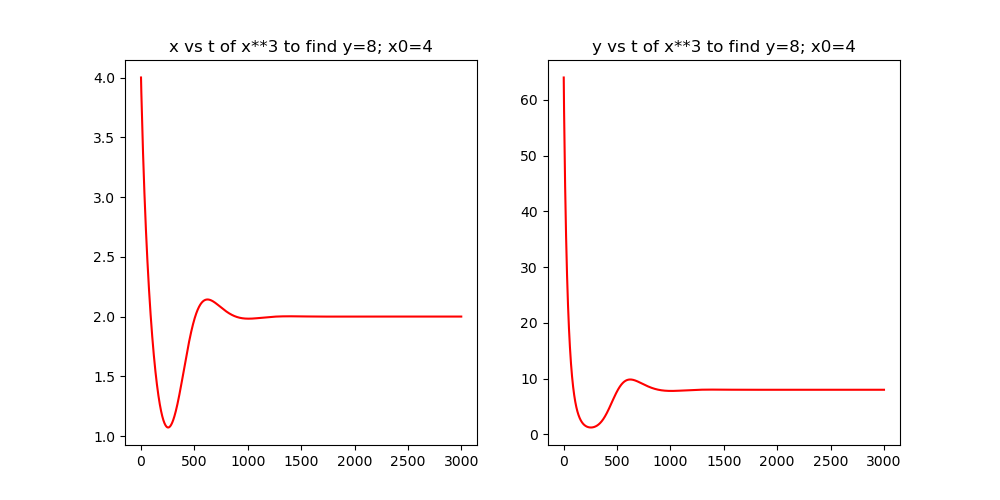

Approx. x value:  2.0000004619563665
Approx. y value:  8.000005543477679
x error:  4.6195636649315475e-07
y error:  5.543477678671138e-06


<IPython.core.display.Javascript object>


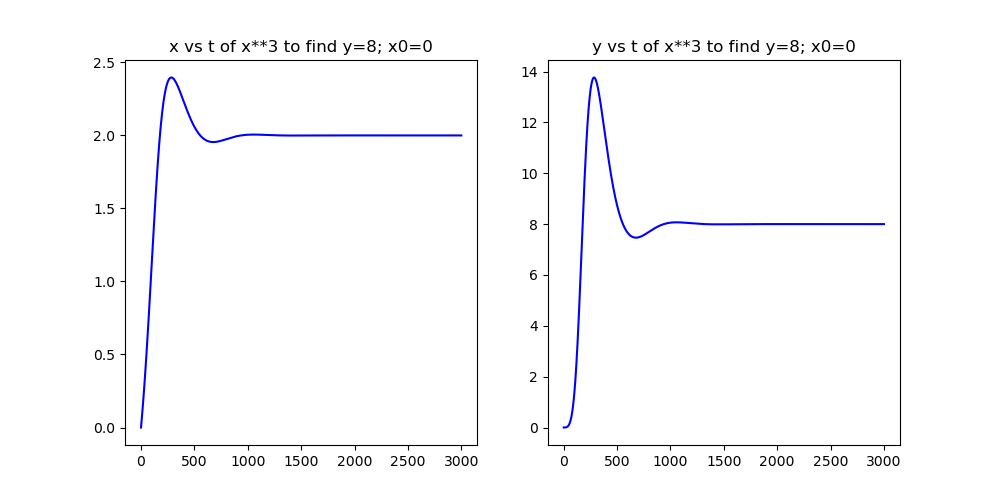

Approx. x value:  1.9999998067745848
Approx. y value:  7.999997681295241
x error:  1.9322541522370784e-07
y error:  2.3187047588635323e-06


In [4]:
kp = 0.001
ki = 9
kd = 0.00000001
num = 3000

N = np.linspace(0, num, num)

#collects data to show pid behavior at different starting points, one starting from the left and one from the right
pid1 = r.PID(f1, kp, ki, kd, 8., n = num, x0 = 4)
pid2 = r.PID(f1, kp, ki, kd, 8., n = num, x0 = 0)


#graphs to show how both the x and y values respond to pid control when starting from the right along with the error values
fig, ax1 = plt.subplots(1, 2, figsize = (10 ,5))

ax1[0].plot(N, pid1[0], 'r-')
ax1[0].set_title('x vs t of x**3 to find y=8; x0=4')

ax1[1].plot(N, pid1[1], 'r-')
ax1[1].set_title('y vs t of x**3 to find y=8; x0=4')

print('Approx. x value: ', str(pid1[0][num - 1]))
print('Approx. y value: ', str(pid1[1][num - 1]))
print('x error: ', str(np.abs(2 - pid1[0][num - 1])))
print('y error: ', str(np.abs(8 - pid1[1][num - 1])))


#graphs to show how both the x and y values respond to pid control when starting from the left along with the error values
fig, ax2 = plt.subplots(1, 2, figsize = (10, 5))

ax2[0].plot(N, pid2[0], 'b-')
ax2[0].set_title('x vs t of x**3 to find y=8; x0=0')

ax2[1].plot(N, pid2[1], 'b-')
ax2[1].set_title('y vs t of x**3 to find y=8; x0=0')

print('Approx. x value: ', str(pid2[0][num - 1]))
print('Approx. y value: ', str(pid2[1][num - 1]))
print('x error: ', str(np.abs(2 - pid2[0][num - 1])))
print('y error: ', str(np.abs(8 - pid2[1][num - 1])))


plt.show()

In [6]:
x1 = np.zeros(num)
y1 = np.zeros(num)
x2 = np.zeros(num)
y2 = np.zeros(num)
x = np.linspace(-4, 4, 1000)
y = f1(x)


#functions for the animation with two points
def init(): 
    dot1.set_data([], [])
    dot2.set_data([], [])
    return dot1, dot2, 

#the coordinates of each point are taken from the results of the pid algorithm -- sped up 2x
def animation(t): 
    x1 = pid1[0][t * 2]
    y1 = pid1[1][t * 2]
    x2 = pid2[0][t * 2]
    y2 = pid2[1][t * 2]
    dot1.set_data(x1, y1)
    dot2.set_data(x2, y2)
    return dot1, dot2,


#graph and animation to show how the coordinates respond on an x ** 3 graph when starting on the left and right of the set value
fig, ax = plt.subplots()

dot1, = ax.plot([], [], 'r.', lw = 2, label = 'x0 = 4') 
dot2, = ax.plot([], [], 'b.', lw = 2, label = 'x0 = 0') 
ax.plot(x, y, 'k-', lw = 0.5)
ax.set_title('y vs x Animation for x**3 with Different Starting Points')


anim = animate.FuncAnimation(fig, animation, init_func = init, frames = int(num / 2), interval = 1, blit = True, repeat = True) 


plt.legend()
plt.show()

<IPython.core.display.Javascript object>

### PID Extrema Behaviors

Due to the nature of PID control, the system doesn't react properly when solving for extrema. This is because, even when there's a small error, the algorithm will continue to adjust the x value until it passes the set value, at which point it'll readjust in order to return to zero error. In other words, it \textit{expects} to overshoot; however, in the case of an extremum set point, it will never reach zero error. The algorithm will pass the extremum and continue to adjust the x value, which will either exponentially increase the error (in cases of an absolute extrema), or it will find another, non-extremum value where the error is zero (in cases of a local extrema).

<IPython.core.display.Javascript object>


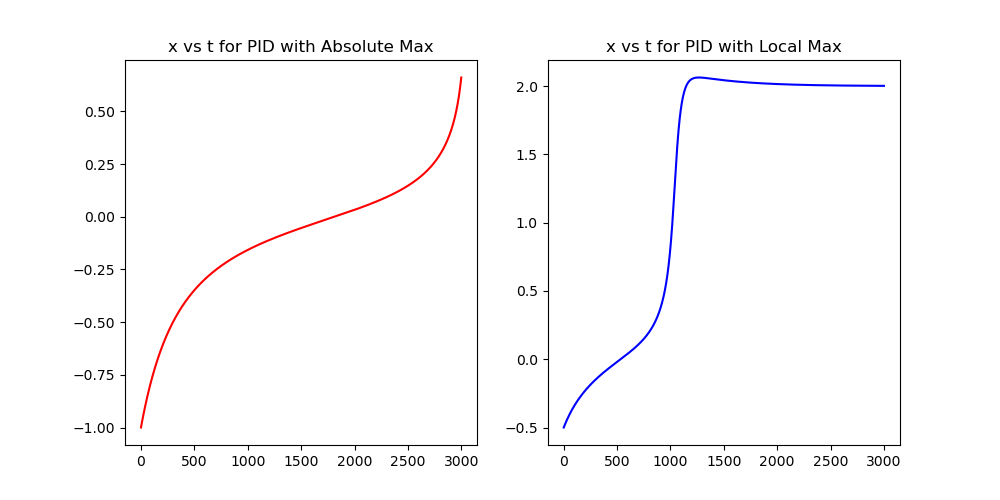

<IPython.core.display.Javascript object>


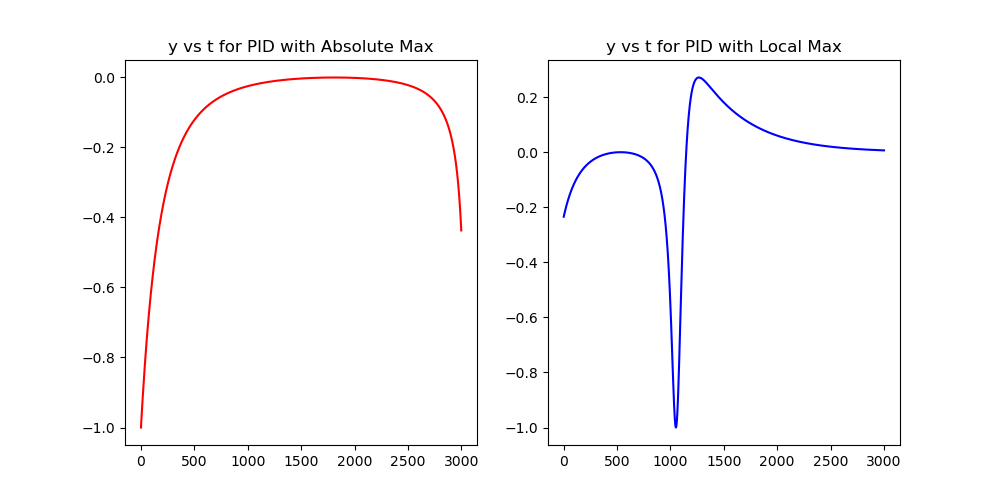

<IPython.core.display.Javascript object>


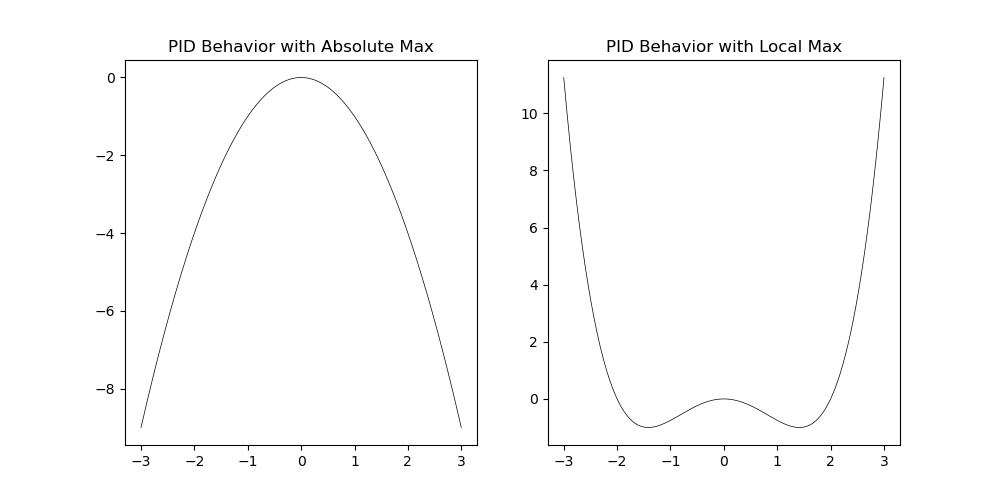

In [7]:

kp1 = 0.005
ki1 = .75
kd1 = 0.0000004
kp2 = 0.01
ki2 = 20.
kd2 = 0.0000002
num = 3000

x1 = np.zeros(num)
y1 = np.zeros(num)
x2 = np.zeros(num)
y2 = np.zeros(num)
N = np.linspace(0, num, num)
x = np.linspace(-3, 3, 1000)
y = np.array([f3(x), f4(x)])

#collects the data for pid control when the set value is a maximum
pid_bad1 = r.PID(f3, kp1, ki1, kd1, 0., n = num, x0 = -1)
pid_bad2 = r.PID(f4, kp2, ki2, kd2, 0., n = num, x0 = -0.5)


#functions for both animations
def init1(): 
    dot1.set_data([], [])
    return dot1, 

def init2(): 
    dot2.set_data([], [])
    return dot2, 

#animated point's coordinates are obtained from the pid with an absolute max -- sped up 3x
def animation1(t): 
    x1 = pid_bad1[0][t * 3]
    y1 = pid_bad1[1][t * 3]
    dot1.set_data(x1, y1)
    return dot1,  

#animated point's coordinates are obtained from the pid with an absolute max -- sped up 3x
def animation2(t): 
    x2 = pid_bad2[0][t * 3]
    y2 = pid_bad2[1][t * 3]
    dot2.set_data(x2, y2)
    return dot2, 


#graph to show how the x's change over each iteration
fig, ax1 = plt.subplots(1, 2, figsize = (10, 5))

ax1[0].plot(N, pid_bad1[0], 'r-')
ax1[0].set_title('x vs t for PID with Absolute Max')

ax1[1].plot(N, pid_bad2[0], 'b-')
ax1[1].set_title('x vs t for PID with Local Max')


#graph to show how the y's change over each iteration
fig, ax2 = plt.subplots(1, 2, figsize = (10, 5))

ax2[0].plot(N, pid_bad1[1], 'r-')
ax2[0].set_title('y vs t for PID with Absolute Max')

ax2[1].plot(N, pid_bad2[1], 'b-')
ax2[1].set_title('y vs t for PID with Local Max')


#animations to show how the pid skip over the max values and go to either infinity (left) or to the next set value that's
#not a max (right)
fig, ax3=plt.subplots(1,2,figsize=(10,5))

dot1, = ax3[0].plot([], [], 'r.', lw = 2) 
ax3[0].plot(x, y[0], 'k-', lw = 0.5)
ax3[0].set_title('PID Behavior with Absolute Max')
anim1 = animate.FuncAnimation(fig, animation1, init_func = init1, frames = int(num / 3), interval = 1, blit = True, repeat = True) 

dot2, = ax3[1].plot([], [], 'b.', lw = 2) 
ax3[1].plot(x, y[1], 'k-', lw = 0.5)
ax3[1].set_title('PID Behavior with Local Max')
anim2 = animate.FuncAnimation(fig, animation2, init_func = init2, frames = int(num / 3), interval = 1, blit = True, repeat = True) 


plt.show()

### PID Adjusted for Extrema

Solving the issue with PID and extrema values is fairly simple. Adjusting the code so that it compares the rate of change of the error, we can use PID to find a set slope along the curve as opposed to a set value. Extremum occur at where the slope equals zero, so we're able to find extremum values by using PID to find the x value where the slope is zero.

<IPython.core.display.Javascript object>


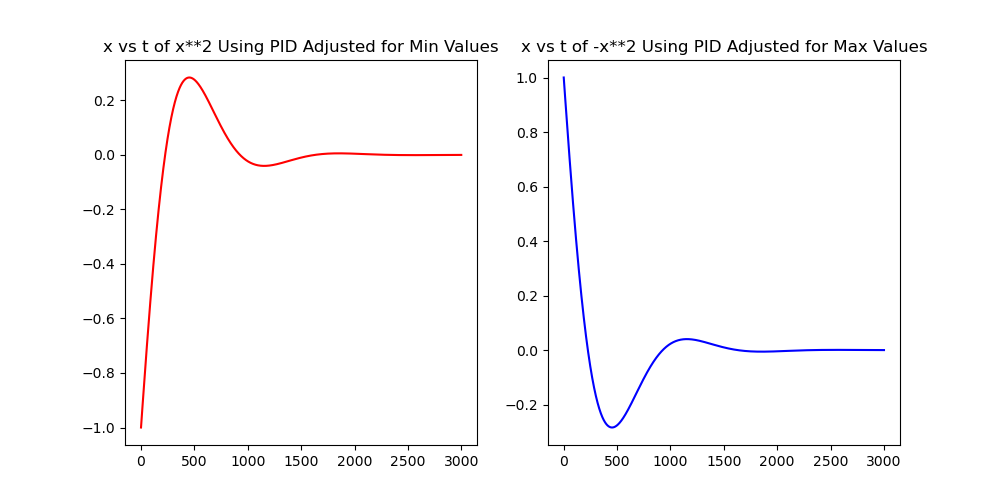

x value of min:  -3.8788002530692685e-05
x value of max:  3.778804081892463e-05


<IPython.core.display.Javascript object>

In [8]:
kp = 0.003
ki = 15.
kd = 0.00000004
num = 3000

x1 = np.zeros(num)
y1 = np.zeros(num)
x2 = np.zeros(num)
y2 = np.zeros(num)
N = np.linspace(0, num, num)
x = np.linspace(-3, 3, 1000)
y = np.array([f2(x), f3(x)])

#data are collected from a pid algorithm adjusted to find extrema values
pid_ex1 = r.PID_extrema(f2, kp, ki, kd, 'min', n = num, x0 = -1.)
pid_ex2 = r.PID_extrema(f3, kp, ki, kd, 'max', n = num, x0 = 1.)


#functions for the animation
def init1(): 
    dot1.set_data([], [])
    return dot1, 

def init2(): 
    dot2.set_data([], [])
    return dot2, 

#the coordinates for the point starting to the left are accessed for the animation -- sped up 3x
def animation1(t): 
    x1 = pid_ex1[0][t * 3]
    y1 = pid_ex1[1][t * 3]
    dot1.set_data(x1, y1)
    return dot1,  

#the coordinates for the point starting to the right are accessed for the animation -- sped up 3x
def animation2(t): 
    x2 = pid_ex2[0][t * 3]
    y2 = pid_ex2[1][t * 3]
    dot2.set_data(x2, y2)
    return dot2, 


#plots to show how the pid extrema function behaves like a regular pid to find the x value where the extrema occur
fig, ax1 = plt.subplots(1, 2, figsize = (10, 5))

ax1[0].plot(N, pid_ex1[0], 'r-')
ax1[0].set_title('x vs t of x**2 Using PID Adjusted for Min Values')

ax1[1].plot(N, pid_ex2[0], 'b-')
ax1[1].set_title('x vs t of -x**2 Using PID Adjusted for Max Values')

print('x value of min: ', str(pid_ex1[0][num - 1]))
print('x value of max: ', str(pid_ex2[0][num - 1]))


#animations showing the behavior of the pid extrema function to find a min (left) and max (right)
fig, ax2 = plt.subplots(1, 2, figsize = (10, 5))

dot1, = ax2[0].plot([], [], 'r.', lw = 2) 
ax2[0].plot(x, y[0], 'k-', lw = 0.5)
ax2[0].set_title('PID Min Behavior Animation for x**2')
anim1 = animate.FuncAnimation(fig, animation1, init_func = init1, frames = int(num / 3), interval = 1, blit = True, repeat = True) 

dot2, = ax2[1].plot([], [], 'b.', lw = 2)
ax2[1].plot(x,y[1], 'k-', lw = 0.5)
ax2[1].set_title('PID Max Behavior Animation for -x**2')
anim2 = animate.FuncAnimation(fig, animation2, init_func = init2, frames = int(num / 3), interval = 1, blit = True, repeat = True) 


plt.show()

### PID Extrema with Original Function Compared to PID with Function's Derivative

Since the PID extrema algorithm responds to the change in the function per change in time, the PID function should respond similarly to the derivative (with the same constants).

<IPython.core.display.Javascript object>


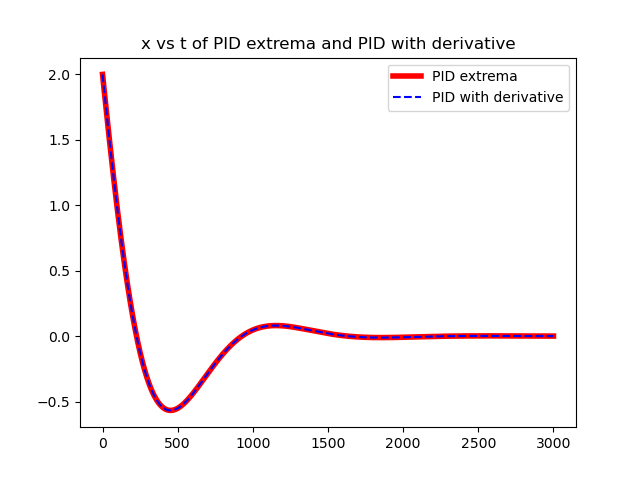

x value of min according to PID extrema:  7.607606251910202e-05
y value of min according to PID extrema:  5.787567288410319e-09
x value of min according to PID with derivative:  7.657604335317544e-05
y value of min according to PID with derivative:  0.00015315208670635088


<IPython.core.display.Javascript object>

In [10]:
kp = 0.003
ki = 15.
kd = 0.00000004
num = 3000

x1 = np.zeros(num)
y1 = np.zeros(num)
x2 = np.zeros(num)
y2 = np.zeros(num)
N = np.linspace(0, num, num)
x = np.linspace(-3, 3, 1000)
y = f2(x)

#data are collected from the pid extrema algorithm with the original function and the regular pid algorithm with the function's
#derivative for comparison
pid_extrem = r.PID_extrema(f2, kp, ki, kd, 'min', n = num, x0 = 2.)
pid_prime = r.PID(f2_prime, kp, ki, kd, 0., n = num, x0 = 2)


#functions for the animation showing both pid algorithms' results
def init(): 
    dot1.set_data([], [])
    dot2.set_data([], [])
    return dot1, dot2


#coordinates are obtained from the pid algorithms; since the regular pid function returns the slope at each x, the x value is 
#put back into the original to get the y -- sped up 3x
def animation(t): 
    x1 = pid_extrem[0][t * 3]
    y1 = pid_extrem[1][t * 3]
    x2 = pid_prime[0][t * 3]
    y2 = f2(x2)
    dot1.set_data(x1, y1)
    dot2.set_data(x2, y2)
    return dot1, dot2 


#an overlay of the pid result with the derivative over the pid extrema result to show they're practically identical -- in fact,
#the extrema algorithm provides a more precise result
fig, ax1 = plt.subplots()

ax1.plot(N, pid_extrem[0], 'r-', lw = 4, label = 'PID extrema')
ax1.plot(N, pid_prime[0], 'b--', label = 'PID with derivative')
ax1.set_title('x vs t of PID extrema and PID with derivative')

print('x value of min according to PID extrema: ', str(pid_extrem[0][num - 1]))
print('y value of min according to PID extrema: ', str(pid_extrem[1][num - 1]))
print('x value of min according to PID with derivative: ', str(pid_prime[0][num - 1]))
print('y value of min according to PID with derivative: ', str(pid_prime[1][num - 1]))


#animation of the two results to show how each algorithm responds to find the max
fig, ax2 = plt.subplots()

dot1, = ax2.plot([], [], marker = '.', color = 'r', markersize = 10, label = 'PID extrema') 
dot2, = ax2.plot([], [], 'b.', label = 'PID with derivative') 
ax2.plot(x, y, 'k-', lw = 0.5)
ax2.set_title('Animation of PID extrema and PID with derivative')
anim = animate.FuncAnimation(fig, animation, init_func = init, frames = int(num / 3), interval = 1, blit = True, repeat = True) 


ax1.legend()
ax2.legend()
plt.show()

### PID Extrema Behavior with Multiple Extremum

Similar to regular PID control, the extremum version converges to the nearest set value, even if there are several y values which equal the set value. However, the extremum PID has an added benefit: it knows the difference between a maximum and a minimum. Even when the value is right next to, say, a minimum, if the algorithm is set to find a maximum, it'll ignore the zero slope value of the min and go to the nearest max. However, if there is no maximum on that side of the min, it'll exponentially go to infinity.

<IPython.core.display.Javascript object>


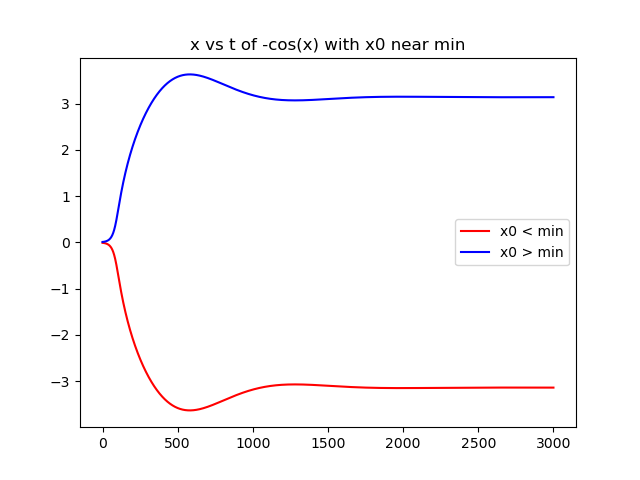

<IPython.core.display.Javascript object>


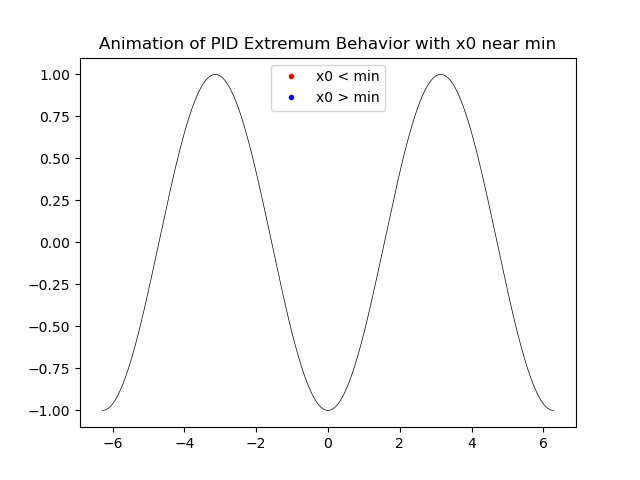

In [14]:
kp = 0.01
ki = 50.
kd = 0.0000008
num = 3000

x1 = np.zeros(num)
y1 = np.zeros(num)
x2 = np.zeros(num)
y2 = np.zeros(num)
N = np.linspace(0, num, num)
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

#pid extrema algorithms are run with very similar arguments to find a max -- the only difference is one starts slightly 
#to the left of a min and the other starts slightly to the right of the same min
pid_sin1 = r.PID_extrema(f5, kp, ki, kd, 'max', n = num, x0 = -0.01)
pid_sin2 = r.PID_extrema(f5, kp, ki, kd, 'max', n = num, x0 = 0.01)


#functions for the animation to show how each point goes to its closest max value
def init(): 
    dot1.set_data([], [])
    dot2.set_data([], [])
    return dot1, dot2, 

#coordinates are collected from the pid results -- sped up 2x
def animation(t): 
    x1 = pid_sin1[0][t * 2]
    y1 = pid_sin1[1][t * 2]
    x2 = pid_sin2[0][t * 2]
    y2 = pid_sin2[1][t * 2]
    dot1.set_data(x1, y1)
    dot2.set_data(x2, y2)
    return dot1, dot2


#plots showing how the x values separate even though they start at nearly the same point
fig, ax1 = plt.subplots()

ax1.plot(N, pid_sin1[0], 'r-', label = 'x0 < min')
ax1.plot(N, pid_sin2[0], 'b-', label = 'x0 > min')
ax1.set_title('x vs t of -cos(x) with x0 near min')


#animation showing the points moving along the sinusoidal to their own respective max values
fig, ax2 = plt.subplots()

dot1, = ax2.plot([], [], 'r.', lw = 2, label = 'x0 < min') 
dot2, = ax2.plot([], [], 'b.', lw = 2, label = 'x0 > min') 
ax2.plot(x, f5(x), 'k-', lw = 0.5)
ax2.set_title('Animation of PID Extremum Behavior with x0 near min')
anim = animate.FuncAnimation(fig, animation, init_func = init, frames = int(num / 2), interval = 1, blit = True, repeat = True) 


ax1.legend()
ax2.legend()
plt.show()

## Fermi's Golden Rule and Atomic Clocks

Fermi's golden rule (FGR) is an equation that gives the probability of transition between two energy eigenstates when placed in a perturbation. The equation is given as
\begin{equation}
\Gamma_{i\rightarrow f}(t)=\frac{\langle{\psi_f|\hat V|\psi_i}\rangle|^2}{\hbar^2(\omega_0-\omega)^2}\sin^2{\left(\frac{(\omega_0-\omega)t}{2}\right)}\qquad \qquad (8)
\end{equation}
Renormalizing for the proportionality constant, the equation used is 
\begin{equation}
\Gamma_{i\rightarrow f}(t)=\frac{\sin^2\left(\frac{(\omega_0-\omega)t}{2}\right)}{(\omega_0-\omega)^2}\qquad \qquad (9)
\end{equation}
Atomic clocks use this principle to match a perturbative frequency with the critical frequency (or the energy difference between the two energy states divided by $\hbar$) of hydrogen and various alaki metals. When the perturbation frequency matches the critical frequency, there is a maximum propability of transition (as seen below). Also, if many atoms are exposed to this perturbation, their average rate of transition will converge to the actual probability value, so many atoms will be needed to ensure little statistical error in the calculations.

<IPython.core.display.Javascript object>


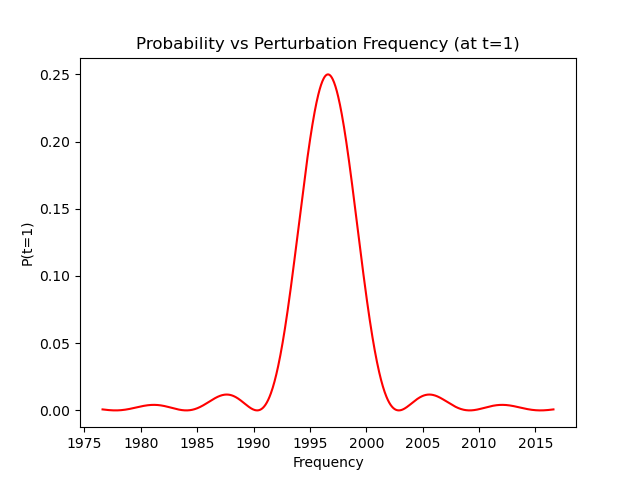

Critical frequency:  1996.605


<IPython.core.display.Javascript object>


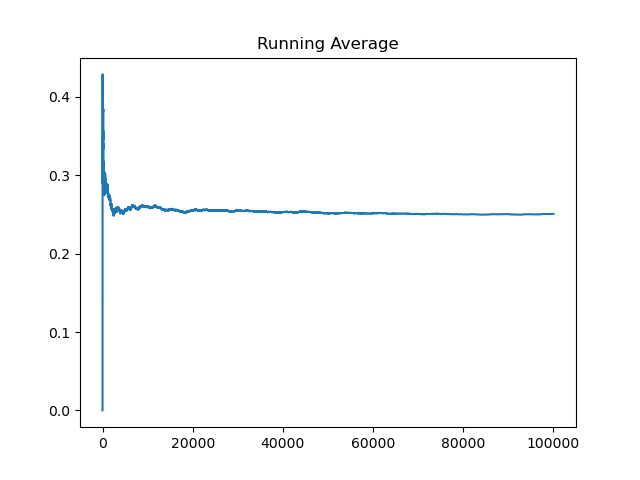

Normalized average transition rate near critical frequency:  0.25337316779729563


<IPython.core.display.Javascript object>


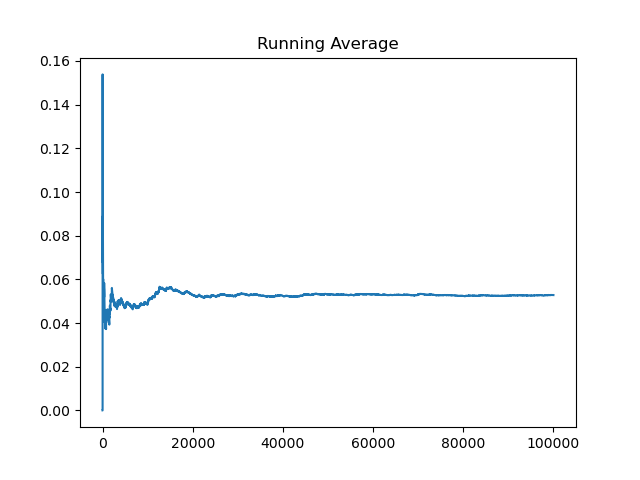

Normalized average transition rate off from critical frequency:  0.0524353140107863


In [15]:
#The critical frequency value calculated using theoretical methods; however, a random amount 2.500<|x|<5.000 is added to 
#simulate approximation error in the theoretical value
w_prime = 2000
w0 = w_prime + (2 * np.random.randint(2) - 1) * (2.5 + np.random.randint(2500) * 0.001)

w = np.linspace(w0 - 20, w0 + 20, 1000)


#plot of the probability curve obtained from FGR at t=1
fig, ax1 = plt.subplots()

ax1.plot(w, P(w), 'r-')
ax1.set_title('Probability vs Perturbation Frequency (at t=1)')
ax1.set_ylabel('P(t=1)')
ax1.set_xlabel('Frequency')

print('Critical frequency: ', str(w0))


#with many random samples, the actual average approaches the theoretical average
w1 = w0 + 0.00001
print('Normalized average transition rate near critical frequency: ', str(r.weighted_coin(P(w1), 100000, win_earn = 1, lose_earn = 0)))
w2 = w0 + 4
print('Normalized average transition rate off from critical frequency: ', str(r.weighted_coin(P(w2), 100000, win_earn = 1, lose_earn = 0)))


plt.show()

### Using PID to find the Critical Frequency

Since the maximum occurs at critical frequency, we can use the PID extremum algorithm to find this value. However, since the function is a sinusoidal with many maximums, the initial frequency will have to be relatively close to the critical frequency. We can determine this initial frequency using a theoretical approach. Unfurtunately, due to errors caused by approximations, we can't know the exact critical frequency using this approach. For this reason, PID is used. 

<IPython.core.display.Javascript object>


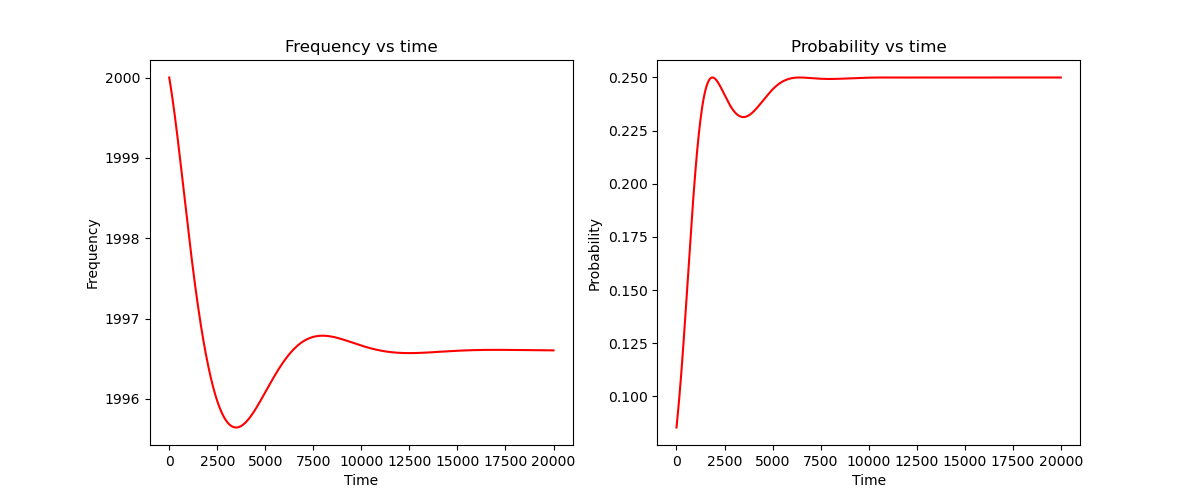

Critical frequency as determined by PID:  1996.6049701938196
Critical frequency error:  2.9806180464220233e-05
Probability of transition at  1996.6049701938196 :  0.24999999998149153


<IPython.core.display.Javascript object>


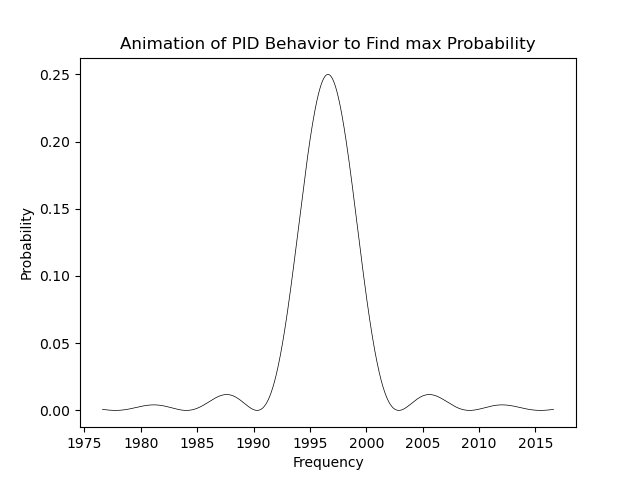

<IPython.core.display.Javascript object>


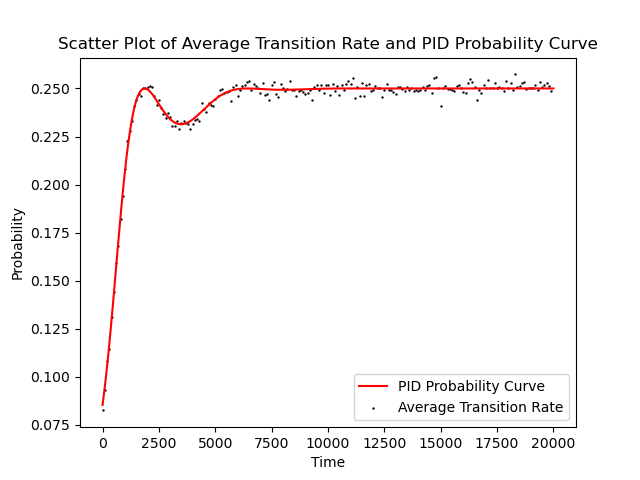

In [16]:
kp = 0.0215
ki = 18.
kd = 0.000005
num = 20000

p0 = np.zeros(int(num / 100))
N = np.linspace(0, num, num)
w = np.linspace(w0-20,w0+20,1000)
N0 = N[::100]
p = P(w)

#data for how the pid extrema algorithm finds the extremum at the critical frequency
pid_prob_ex = r.PID_extrema(P, kp, ki, kd, 'max', n = num, x0 = w_prime)

#with many "atoms", the actual average is close to the theoretical average -- only 200 points are taken
for i in range(int(num / 100)):
    p0[i] = r.weighted_coin(pid_prob_ex[1][i * 100], 100000, win_earn = 1, lose_earn = 0, plot = False)


#functions for the animation
def init(): 
    prob.set_data([], []) 
    return prob,

#coordinates for the point are collected from the results of the pid extrema algorithm -- sped up 10x
def animation(t): 
    w1 = pid_prob_ex[0][t * 10]
    p1 = pid_prob_ex[1][t * 10]
    prob.set_data(w1, p1)
    return prob,


#plots showing how both the frequency and probability are affected by the algorithm along with the values obtained 
#and the error in the critical frequency
fig, ax1 = plt.subplots(1, 2, figsize = (12, 5))

ax1[0].plot(N, pid_prob_ex[0], 'r-')
ax1[0].set_title('Frequency vs time')
ax1[0].set_xlabel('Time')
ax1[0].set_ylabel('Frequency')

ax1[1].plot(N, pid_prob_ex[1], 'r-')
ax1[1].set_title('Probability vs time')
ax1[1].set_xlabel('Time')
ax1[1].set_ylabel('Probability')

print('Critical frequency as determined by PID: ', str(pid_prob_ex[0][num - 1]))
print('Critical frequency error: ', str(np.abs(w0 - pid_prob_ex[0][num - 1])))
print('Probability of transition at ', str(pid_prob_ex[0][num - 1]), ': ', str(pid_prob_ex[1][num - 1]))


#animation showing how the algorithm follows the probability curve to find the max
fig, ax2 = plt.subplots()

prob, = ax2.plot([], [], 'r.') 
ax2.plot(w, p, 'k-', lw = 0.5)
ax2.set_title('Animation of PID Behavior to Find max Probability')
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Probability')
anim = animate.FuncAnimation(fig, animation, init_func = init, frames = int(num / 10) - 1, interval = 1, blit = True, repeat = True) 


#scatter plot with the probability curve showing that the actual average follows the theoretical average
fig, ax3 = plt.subplots()

ax3.plot(N, pid_prob_ex[1], 'r-', label = 'PID Probability Curve')
ax3.scatter(N0, p0, color = 'k', s = 0.5, label = 'Average Transition Rate')
ax3.set_title('Scatter Plot of Average Transition Rate and PID Probability Curve')
ax3.set_xlabel('Time')
ax3.set_ylabel('Probability')


ax3.legend()
plt.show()

### Time Dependency of FGR

An interesting feature of FGR is its time dependency. The frequency where the maximum occurs remains at the critical value, but the probability of transition increases. An animation of the time evolution is shown below.

<IPython.core.display.Javascript object>


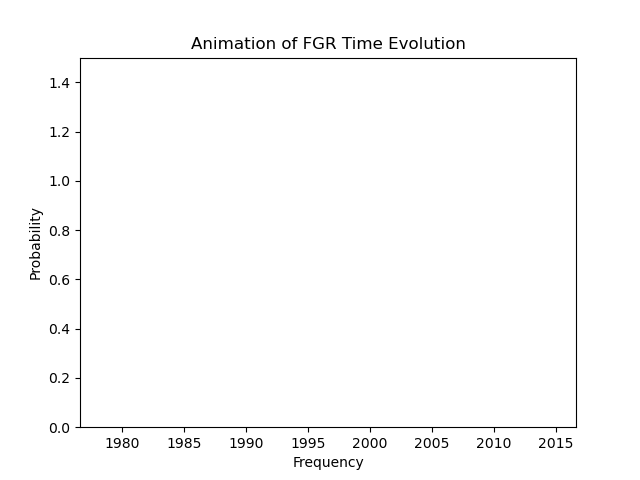

In [17]:
#functions for the animation showing the time evolution of FGR
def init(): 
    prob.set_data([], []) 
    return prob, 

#data points are collected, with the probability curve moving forward in time
def animation(t): 
    w = np.linspace(w0 - 20, w0 + 20, 1000)
    p = P(w, t = t / 500)
    prob.set_data(w, p)
    return prob, 


#graph for the animation -- the probability goes past 1 due to the renormalization
fig, ax = plt.subplots()

prob, = ax.plot([], [], 'k-', lw = 1) 
ax.set_xlim(w0 - 20, w0 + 20)
ax.set_ylim(0, 1.5)
ax.set_title('Animation of FGR Time Evolution')
ax.set_xlabel('Frequency')
ax.set_ylabel('Probability')
anim = animate.FuncAnimation(fig, animation, init_func = init, frames = 1000, interval = 1, blit = True, repeat = True) 


plt.show()

### Taking Advantage of the Time Evolution to Improve PID Application

The biggest issue with the way PID has been used in the previous examples is it requires the system to take many measurements at exactly the same time each measurement. The experiment needs to be run many times, which requires a lot of waiting (in this example, waiting one second to take each measurement over 20000 iterations will take over 5 hours!). However, physicists are able to take advantage of the time evolution to speed up the process. As seen in the animation, during early exposure, the nearest minimas to the critical max are spread out, allowing for a higher error in the theoretical approach (as long as the PID responds quicker than the evolution). If for each measurement the starting value for the PID algorithm is made to be the previous measurement's result, physicists won't have to wait as long, but they'll need a higher measurement rate (in this example, the experiment only takes 2 seconds, but 1000 measurements will need to be made per second). In addition, as the atoms are exposed to the perturbation for longer times, the derivative of the probability curve increases. Since the PID_extrema function responds to the derivative, this gives a much more precise result. Unfortunately, by doing this, the integral term disappears and the response curve becomes an exponential. 

<IPython.core.display.Javascript object>


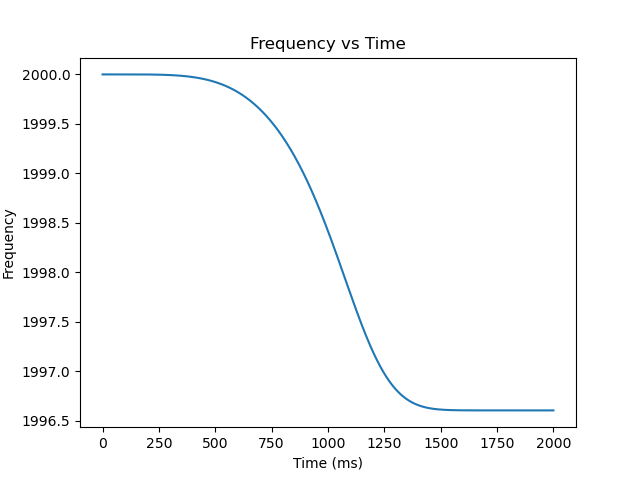

<IPython.core.display.Javascript object>


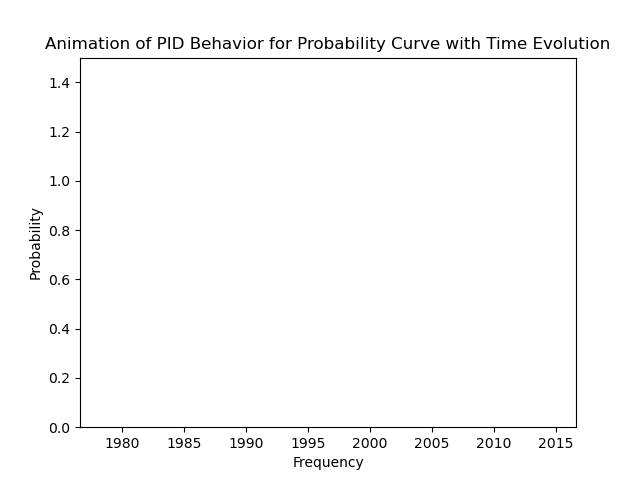

Critical Frequency Determined with PID:  1996.6049995000067


In [18]:
kp = 0.1
ki = 0.
kd = 0.000005
num = 2000

w_prime1 = w_prime
w1 = np.zeros(num)
p1 = np.zeros(num)
N = np.linspace(0, num, num)


#functions for the animation showing how the pid acts with the time evolution
def init(): 
    prob.set_data([], []) 
    dot.set_data([],[])
    return prob, dot,

#both the probability curve and the pid extrema results are animated over 2 seconds, showing how the pid responds to time
#evolution to find the extremum
def animation(t): 
    w = np.linspace(w0 - 20, w0 + 20, 1000)
    p = P(w, t = 0.002 * (t + 1))
    x = w1[(t + 1) * 2]
    y = p1[(t + 1) * 2]
    prob.set_data(w, p)
    dot.set_data(x, y)
    return prob, dot,

#data are collected for two seconds while updating the initial frequency for each iteration of the algorithm; n = 2 so only 
#one adjustment is made per time change -- one for the initial value, and one for the updated value.
for i in range(num):
    def P0(w, t = 0.001 * (i + 1)):
        return (np.sin((w0 - w) * t / 2) / (w0 - w)) ** 2
    
    pid_t = r.PID_extrema(P0, kp, ki, kd, 'max', n = 2, x0 = w_prime1)
    w1[i] = pid_t[0][1]
    p1[i] = pid_t[1][1]
    w_prime1 = w1[i]


#graph to show how the pid changes the frequency as the probability curve evolves
fig, ax1 = plt.subplots()

ax1.plot(N, w1)
ax1.set_title('Frequency vs Time')    
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Frequency')


#animation showing how the pid algorithm changes frequency and probability in accordance with the evolving probability curve
fig, ax2 = plt.subplots() 

prob, = ax2.plot([], [], 'k-', lw = .5) 
dot, = ax2.plot([], [], 'r.')
ax2.set_xlim(w0 - 20, w0 + 20)
ax2.set_ylim(0, 1.5)
ax2.set_ylabel('Probability')
ax2.set_xlabel('Frequency')
ax2.set_title('Animation of PID Behavior for Probability Curve with Time Evolution')
anim = animate.FuncAnimation(fig, animation, init_func = init, frames = 1000, interval = 1, blit = True, repeat = True) 

print('Critical Frequency Determined with PID: ', str(w1[num - 1]))


plt.show()

### Final Thoughts

After a while, the PID extrema function doesn't respond well to disturbances since the nearby min values close in. Therefore, this method is only useful to determine the critical frequency. However, after that value is found, the previous method should be used since the nearby min values are still far enough away and it only requires to have one measurement taken per time interval. 